# Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов
__Tариф «Смарт»__
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.   

__Тариф «Ультра»__
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

# Шаг 1. Откройте файлы с данными и изучите общую информацию

Для начала прочитаем файлы и сохраним  в переменных. выведем на экран первые 10 строк таблиц. Первый взгляд на сырые данные - это важная часть любого исследования.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns
calls = pd.read_csv('/datasets/calls.csv') 
display(calls.head(10))
calls.info()

internet = pd.read_csv('/datasets/internet.csv') 
display(internet.head(10))
internet.info()

messages = pd.read_csv('/datasets/messages.csv') 
display(messages.head(10))
messages.info()

tariffs = pd.read_csv('/datasets/tariffs.csv') 
display(tariffs.head(10))
tariffs.info()

users = pd.read_csv('/datasets/users.csv') 
display(users.head(10))
users.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**

Всего у нас 5 таблиц, пропуски есть только в таблице users в колонке churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).
На следующем этапе приведем данные к нужным типам в тех колонках, которые нам будут нужны для дальнейшей работы.

# Шаг 2. Предобработка данных

Приведем данные к нужным типам и исправим ошибки, если они есть.

In [13]:
#в первой таблице изменим только типы данных в двух колонках.
calls['call_date']= pd.to_datetime(calls['call_date'])
calls['id'] = calls['id'].apply(int)
calls['month'] = calls['call_date'].astype('datetime64[M]') #добавим столбец с месяцем, он будет нужен в дальнейшем для рассчетов
calls['duration'] = calls['duration'].apply(np.ceil)
calls.info()
display(calls.head())
calls.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 7.7 MB


,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.0,1000,2018-07-01
1,10001,2018-08-17,0.0,1000,2018-08-01
2,10002,2018-06-11,3.0,1000,2018-06-01
3,10003,2018-09-21,14.0,1000,2018-09-01
4,10004,2018-12-15,6.0,1000,2018-12-01


0

In [14]:
# во второй таблице также изменим  типы данных в двух колонках.
internet['session_date']= pd.to_datetime(internet['session_date'])
internet['id'] = internet['id'].apply(int)
internet['month'] = internet['session_date'].astype('datetime64[M]')

internet.info()
display(internet.head())
internet.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 6.8 MB


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,10000,112.95,2018-11-25,1000,2018-11-01
1,1,10001,1052.81,2018-09-07,1000,2018-09-01
2,2,10002,1197.26,2018-06-25,1000,2018-06-01
3,3,10003,550.27,2018-08-22,1000,2018-08-01
4,4,10004,302.56,2018-09-24,1000,2018-09-01


0

In [15]:
# в третьей таблице изменим только типы данных в двух колонках.
messages['message_date']= pd.to_datetime(messages['message_date'])
messages['id'] = messages['id'].apply(int)
messages['month'] = messages['message_date'].astype('datetime64[M]')
messages.info()
display(messages.head())
messages.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.8 MB


,id,message_date,user_id,month
0,10000,2018-06-27,1000,2018-06-01
1,10001,2018-10-08,1000,2018-10-01
2,10002,2018-08-04,1000,2018-08-01
3,10003,2018-06-16,1000,2018-06-01
4,10004,2018-12-05,1000,2018-12-01


0

In [16]:
# в пятой таблице изменим тип данных в одной колонке.
users['reg_date']= pd.to_datetime(users['reg_date'])
users.info()
display(users.head())
users.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


0

In [17]:
display(internet.query('mb_used == 0'))
display(calls.query('duration == 0'))

#в данных могут встречаться нули (например в колонках с продолжительностью звонков и интернет-трафиком) их мы не будем удалять, так как нулями могут быть обозначены пропущенные вызовы , а интернет трафик пользователь может не использовать так как естиь доступ к wi-fi. 

,Unnamed: 0,id,mb_used,session_date,user_id,month
11,11,100011,0.0,2018-08-28,1000,2018-08-01
38,38,100038,0.0,2018-11-27,1000,2018-11-01
46,46,100046,0.0,2018-06-30,1000,2018-06-01
67,67,100067,0.0,2018-06-16,1000,2018-06-01
72,72,100072,0.0,2018-06-15,1000,2018-06-01
...,...,...,...,...,...,...
149380,149380,1499141,0.0,2018-12-11,1499,2018-12-01
149381,149381,1499142,0.0,2018-11-01,1499,2018-11-01
149383,149383,1499144,0.0,2018-11-27,1499,2018-11-01
149386,149386,1499147,0.0,2018-10-21,1499,2018-10-01


,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.0,1000,2018-07-01
1,10001,2018-08-17,0.0,1000,2018-08-01
5,10005,2018-11-02,0.0,1000,2018-11-01
6,10006,2018-10-18,0.0,1000,2018-10-01
9,10009,2018-08-15,0.0,1000,2018-08-01
...,...,...,...,...,...
202590,1499203,2018-12-03,0.0,1499,2018-12-01
202592,1499205,2018-10-13,0.0,1499,2018-10-01
202593,1499206,2018-12-26,0.0,1499,2018-12-01
202594,1499207,2018-10-28,0.0,1499,2018-10-01


Теперь посчитаем для каждого пользователя :  
-количество сделанных звонков и израсходованных минут разговора по месяцам;  
-количество отправленных сообщений по месяцам;  
-объем израсходованного интернет-трафика по месяцам;  
-помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Будем делать сводные таблицы отдельно для звонков, для сообщений и трафика, затем методом merge() будем поэтапно объединять. 

In [18]:
calls_users = calls.pivot_table(index = ['user_id', 'month'] , values = 'duration', aggfunc = 'sum') #делаем группировку и считаем продолжительность звонков по пользователям в месяц.  
display(calls_users)

duration
user_id month               
1000    2018-05-01     159.0
        2018-06-01     172.0
        2018-07-01     340.0
        2018-08-01     408.0
        2018-09-01     466.0
...                      ...
1498    2018-10-01     247.0
1499    2018-09-01      70.0
        2018-10-01     449.0
        2018-11-01     612.0
        2018-12-01     492.0

[3174 rows x 1 columns]

In [19]:
messages_users = messages.pivot_table(index = ['user_id', 'month'] , values = 'id', aggfunc = 'count') 
messages_users = messages_users.rename(columns = {'id': 'messages_count'})
display(messages_users)


messages_count
user_id month                     
1000    2018-05-01              22
        2018-06-01              60
        2018-07-01              75
        2018-08-01              81
        2018-09-01              57
...                            ...
1498    2018-10-01              42
1499    2018-09-01              11
        2018-10-01              48
        2018-11-01              59
        2018-12-01              66

[2717 rows x 1 columns]

In [20]:
internet_users = internet.pivot_table(index = ['user_id', 'month'] , values = 'mb_used', aggfunc = 'sum')
internet_users['mb_used'] = np.ceil(internet_users['mb_used'])
display(internet_users)

mb_used
user_id month              
1000    2018-05-01   2254.0
        2018-06-01  23234.0
        2018-07-01  14004.0
        2018-08-01  14056.0
        2018-09-01  14569.0
...                     ...
1498    2018-10-01  20580.0
1499    2018-09-01   1846.0
        2018-10-01  17789.0
        2018-11-01  17964.0
        2018-12-01  13056.0

[3203 rows x 1 columns]

In [21]:
test = calls_users.merge(messages_users, on = ['user_id', 'month'], how = 'outer' ) #делаем объединение таблиц
test

duration  messages_count
user_id month                               
1000    2018-05-01     159.0            22.0
        2018-06-01     172.0            60.0
        2018-07-01     340.0            75.0
        2018-08-01     408.0            81.0
        2018-09-01     466.0            57.0
...                      ...             ...
1489    2018-08-01       NaN            17.0
        2018-09-01       NaN            32.0
        2018-10-01       NaN            21.0
        2018-11-01       NaN            20.0
        2018-12-01       NaN            35.0

[3213 rows x 2 columns]

In [22]:
data = test.merge (internet_users, on = ['user_id', 'month'], how = 'outer' )
data

duration  messages_count  mb_used
user_id month                                        
1000    2018-05-01     159.0            22.0   2254.0
        2018-06-01     172.0            60.0  23234.0
        2018-07-01     340.0            75.0  14004.0
        2018-08-01     408.0            81.0  14056.0
        2018-09-01     466.0            57.0  14569.0
...                      ...             ...      ...
1489    2018-09-01       NaN            32.0  17207.0
        2018-10-01       NaN            21.0  19560.0
        2018-11-01       NaN            20.0  17492.0
        2018-12-01       NaN            35.0  17323.0
1476    2018-04-01       NaN             NaN    531.0

[3214 rows x 3 columns]

In [23]:
data = data.reset_index().merge(users[['city', 'tariff','user_id']], on = 'user_id', how = 'outer' )
data

,user_id,month,duration,messages_count,mb_used,city,tariff
0,1000,2018-05-01,159.0,22.0,2254.0,Краснодар,ultra
1,1000,2018-06-01,172.0,60.0,23234.0,Краснодар,ultra
2,1000,2018-07-01,340.0,75.0,14004.0,Краснодар,ultra
3,1000,2018-08-01,408.0,81.0,14056.0,Краснодар,ultra
4,1000,2018-09-01,466.0,57.0,14569.0,Краснодар,ultra
...,...,...,...,...,...,...,...
3211,1489,2018-10-01,NaN,21.0,19560.0,Санкт-Петербург,smart
3212,1489,2018-11-01,NaN,20.0,17492.0,Санкт-Петербург,smart
3213,1489,2018-12-01,NaN,35.0,17323.0,Санкт-Петербург,smart
3214,1128,NaT,NaN,NaN,NaN,Волжский,ultra


In [24]:
data = data.merge(tariffs, how='left', left_on='tariff', right_on='tariff_name') #наша итоговая таблица после всех объединений.
data 

,user_id,month,duration,messages_count,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05-01,159.0,22.0,2254.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06-01,172.0,60.0,23234.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07-01,340.0,75.0,14004.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08-01,408.0,81.0,14056.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09-01,466.0,57.0,14569.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,2018-10-01,NaN,21.0,19560.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3212,1489,2018-11-01,NaN,20.0,17492.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3213,1489,2018-12-01,NaN,35.0,17323.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3214,1128,NaT,NaN,NaN,NaN,Волжский,ultra,1000,30720,3000,1950,150,1,1,ultra


In [25]:
data.isna().sum() #после присоединения таблиц образовалось много пропущенных значений, заполним значения нулями, а две строки с пропусками в колонке месяц удалим, на дальнейшее исследование это сильно не повлияет.

user_id                    0
month                      2
duration                  42
messages_count           499
mb_used                   13
city                       0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
tariff_name                0
dtype: int64

In [26]:
data.dropna(subset = ['month'], inplace=True)
data = data.fillna(0)
data.isna().sum()

user_id                  0
month                    0
duration                 0
messages_count           0
mb_used                  0
city                     0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Теперь напишем функцию, которая принимает строку датафрейма как аргумент(row), для расчета помесячной выручки с каждого пользователя.

In [27]:
def calculate_total_cost(row):
    total_cost = 0
    total_cost += row['rub_monthly_fee']
    
    paid_calls = row['duration'] - row['minutes_included']
    if (paid_calls > 0):
        total_cost += paid_calls * row['rub_per_minute']
        
    paid_messages = row['messages_count'] - row['messages_included']
    if (paid_messages > 0):
        total_cost += paid_messages * row['rub_per_message'] 
    
    paid_mbs = row['mb_used'] - row['mb_per_month_included']
    if (paid_mbs > 0):
        paid_gbs = np.ceil(paid_mbs / 1024)
        total_cost += paid_gbs * row['rub_per_gb']     
        
    
    
    
    return total_cost 


In [28]:
data['total_cost'] = data.apply(calculate_total_cost, axis=1) #создаем отдельный столбец с выручкой
data

,user_id,month,duration,messages_count,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_cost
0,1000,2018-05-01,159.0,22.0,2254.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,2018-06-01,172.0,60.0,23234.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,2018-07-01,340.0,75.0,14004.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,2018-08-01,408.0,81.0,14056.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,2018-09-01,466.0,57.0,14569.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-01,0.0,17.0,11051.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart,550.0
3210,1489,2018-09-01,0.0,32.0,17207.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart,950.0
3211,1489,2018-10-01,0.0,21.0,19560.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart,1550.0
3212,1489,2018-11-01,0.0,20.0,17492.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart,1150.0


Теперь наши данные подготовлены к дальнейшему анализу.

# Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Для начала определим среднее количество минут разговора для каждого из тарифов и построим гистограмму распределения.

In [29]:
calls_duration_smart = data.query('tariff == "smart"').groupby(['user_id','month']).agg({'duration': 'sum'})
print(calls_duration_smart['duration'].mean())

417.9349484073576


In [30]:
calls_duration_ultra = data.query('tariff == "ultra"').groupby(['user_id', 'month']).agg({'duration': 'sum'})
print(calls_duration_ultra['duration'].mean())


526.6233502538071


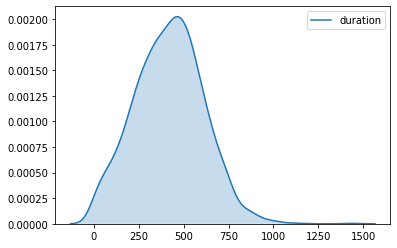

In [31]:
snsplot = sns.kdeplot(calls_duration_smart['duration'], shade=True)
fig = snsplot.get_figure()

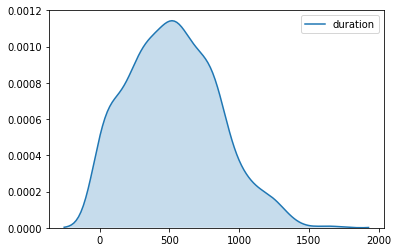

In [32]:
snsplot = sns.kdeplot(calls_duration_ultra['duration'], shade=True)
fig = snsplot.get_figure()

Теперь найдем дисперсию и стандартное отклонение.

In [33]:
print('Дисперсия продолжительности для тарифного плана смарт' , np.var(calls_duration_smart['duration'], ddof=1))
print('Дисперсия продолжительности для тарифного плана ультра', np.var(calls_duration_ultra['duration'],ddof=1))


Дисперсия продолжительности для тарифного плана смарт 36219.31578434428
Дисперсия продолжительности для тарифного плана ультра 100873.63339730098


In [34]:
print('Стандартное отклонение продолжительности для тарифного плана смарт' , np.std(calls_duration_smart['duration'], ddof=1))
print('Стандартное отклонение продолжительности для тарифного плана ультра', np.std(calls_duration_ultra['duration'],ddof=1))

Стандартное отклонение продолжительности для тарифного плана смарт 190.31372988921288
Стандартное отклонение продолжительности для тарифного плана ультра 317.6060978591264


Что можно сказать исходя из приведенных выше данных. Среднее количество минут разговора в тарифе Смарт максимально приближено к значению, которое включено в пакет услуг и составляет 418 минут. Количество минут в Ультра, которое включено в тарифный план значительно превышает среднее значение из выборки, которое мы получили, в среднем пользователи данного тарифа тратят 527 минут на разговоры. 
По нашим графикам и результатам вычесления среднего отклонения можно увидеть как сильно разбросаны данные относительно среднего. На графике Ультра хвост длинне чем у Смарт, логично ведь в тарифный план включены 3000 минут разговора, несмотря на то, что в среднем люди не тратят больше чем 527 минут в месяц, наверняка есть те, кто использует все включенные минуты.

Посмотрим на среднее количество сообщений и распределение на графике.

In [35]:
messages_count_smart = data.query('tariff == "smart"').groupby(['user_id','month']).agg({'messages_count': 'sum'})
print(messages_count_smart['messages_count'].mean())

33.384028712427096


In [36]:
messages_count_ultra = data.query('tariff == "ultra"').groupby(['user_id','month']).agg({'messages_count': 'sum'})
print(messages_count_ultra['messages_count'].mean())

49.36345177664975


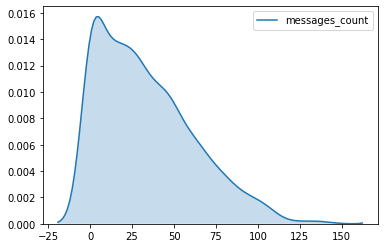

In [37]:
snsplot = sns.kdeplot(messages_count_smart['messages_count'], shade=True)
fig = snsplot.get_figure()

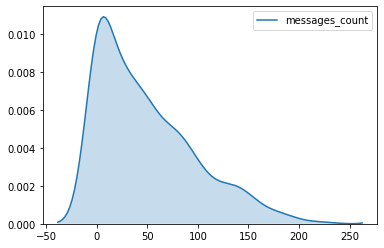

In [38]:
snsplot = sns.kdeplot(messages_count_ultra['messages_count'], shade=True)
fig = snsplot.get_figure()

In [39]:
print('Дисперсия сообщений для тарифного плана смарт' , np.var(messages_count_smart['messages_count'], ddof=1))
print('Дисперсия сообщений для тарифного плана ультра', np.var(messages_count_ultra['messages_count'],ddof=1))


Дисперсия сообщений для тарифного плана смарт 796.8129584480083
Дисперсия сообщений для тарифного плана ультра 2285.266142544674


In [40]:
print('Стандартное отклонение сообщений для тарифного плана смарт' , np.std(messages_count_smart['messages_count'], ddof=1))
print('Стандартное отклонение сообщений для тарифного плана ультра', np.std(messages_count_ultra['messages_count'],ddof=1))

Стандартное отклонение сообщений для тарифного плана смарт 28.22787555676141
Стандартное отклонение сообщений для тарифного плана ультра 47.80445735017472


Какой вывод можно сделать: в среднем пользователи тарифа Смарт отправляют 33 сообщения в месяц, в тарифный план входят 50 сообщений. В тарифе Ультра пользователи отправляют 49 сообщений из 3000 включенных в тариф. На гистограммах можно увидеть длинные хвосты распределения.
Еще можно заметить, что оба графика скошены вправо, это говорит о том, что среднее больше чем медиана, значит в выборке есть клиенты, которые значительно превышают свой лимит сообщений. 

Посмотрим какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [41]:
mb_used_smart = data.query('tariff == "smart"').groupby(['user_id','month']).agg({'mb_used': 'sum'})
print(mb_used_smart['mb_used'].mean())

16208.873485868102


In [42]:
mb_used_ultra = data.query('tariff == "ultra"').groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
print(mb_used_ultra['mb_used'].mean())

19469.308629441624


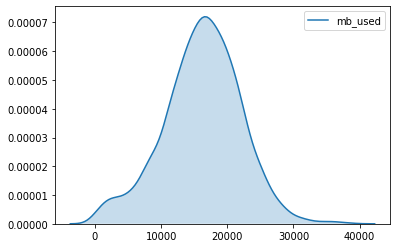

In [43]:
snsplot = sns.kdeplot(mb_used_smart['mb_used'], shade=True)
fig = snsplot.get_figure()

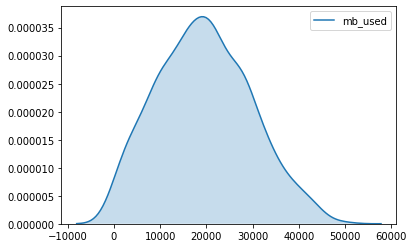

In [44]:
snsplot = sns.kdeplot(mb_used_ultra['mb_used'], shade=True)
fig = snsplot.get_figure()

In [45]:
print('Дисперсия интернет-трафика для тарифного плана смарт' , np.var(mb_used_smart['mb_used'], ddof=1))
print('Дисперсия интернет-трафика для тарифного плана ультра', np.var(mb_used_ultra['mb_used'],ddof=1))


Дисперсия интернет-трафика для тарифного плана смарт 34462562.80624911
Дисперсия интернет-трафика для тарифного плана ультра 101751557.96562667


In [46]:
print('Стандартное отклонение интернет-трафика для тарифного плана смарт' , np.std(mb_used_smart['mb_used'], ddof=1))
print('Стандартное отклонение интернет-трафика для тарифного плана ультра', np.std(mb_used_ultra['mb_used'],ddof=1))

Стандартное отклонение интернет-трафика для тарифного плана смарт 5870.482331652921
Стандартное отклонение интернет-трафика для тарифного плана ультра 10087.197726109402


Пользователи тарифа Смарт в среднем расходуют 16229 Mб трафика, что составляет примерно 15,85 Гб это значение уже немного за пределами месячного лимита в 15Гб, а пользователи тарифа Ультра в среднем расходуют 19487 Мб или 19 Гб из предложенных 30 Гб в месяц.



**Вывод**

Исходя из проведенного анализа, можно сказать, что тариф Смарт содержит минимально необходимый пакет с услугами для потребителя, за исключением интернета, как показывает статистика в месяц клиенты потребляют больше 15Гб. Как можно заметить из анализа пользователи тарифа Ультра в основном не используют полностью тарифный пакет, но скорее всего этот тариф более привлекавтельный из-за большего интернет-трафика. 

# Шаг 4. Проверьте гипотезы

**-средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;**   
**-средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Проверяем первую исследовательскую гипотезу: Средние выручки по тарифам различаются.
Она трансформируется в две статистические гипотезы:
    - Н0: средняя выручка по тарифам равна  
    - Н1: средняя выручка по тарифам не равна  
Проведем t-тест, используя метод scipy.stats.ttest_ind (array1, array2,equal_var)

In [47]:
smart = data[data['tariff'] == "smart"]['total_cost']
ultra = data[data['tariff'] == "ultra"]['total_cost']
#display(smart)
#print(ultra)

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    smart, 
    ultra,)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Проверяем вторую исследовательскую гипотезу: Средняя выручка пользователей Москвы отличается от выручки из других регионов. Она трансформируется в две статистические гипотезы: 
- Н0: средняя выручка  равна  
- Н1: средняя выручка по тарифам не равна   
Проведем t-тест, используя метод scipy.stats.ttest_ind (array1, array2,equal_var)  

In [48]:
Moscow_city = data[data['city'] == "Москва"]['total_cost']
Other_cities = data[data['city'] != "Москва"]['total_cost']
#display(Moscow_city)
#display(Other_cities)



In [49]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Moscow_city, 
    Other_cities,)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод**

И так по итогам исследований можно сказать, что выручка по тарифам всё же отличается и средняя выручка от тарифов по Москве не отличается от выручки по остальным регионам.

# Шаг 5. Общий вывод

В заключении хотелось бы сказать, что была проведена большая работа в области анализа данных на основе небольшой выборки клиентов от оператора стовой связи. Целью которой было, определение лучшего тарифа, по итогам анализа поведения клиентов.

На этапе подготовки данных было проведено слияние 5 датасетов в одну таблицу для дальнейшего анализа. 
На этапе анализа поведения клиентов мы определили следующее, что тариф Смарт более оптимален для людей, которым не нужен большой интернет-трафик, в среднем пользователи обоих тарифов не превышают свои месячные лимиты по звонкам и сообщениям, которые включены в пакет услуг. В целом тариф Ультра лучше, так как средние значения по всем критериям(звонки, сообщения и интернет-трафик) не превышали месячные лимиты.
